# WeRateDogs Twitter Analysis

### Introduction
In this project, we will analyze a popular Twitter account [@dog_rates](twitter.com/dog_rates), also known as WeRateDogs. WeRateDogs rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10 and a numerator that greater than 10, such as as11/10, 12/10, 13/10, etc. People love WeRateDogs's tweets because of this fun rating system! 

Through this analysis, we will find out the relationship between WeRateDog's rating and people's reactions; likes and retweets. Does a higher rating bring more like or retweet? Let's find out!

Also, we will find out the popular dog breed by the number of retweets and likes to find out internet users' favorite dog breeds.

![weratedogs](images/WeRateDogs_Twitter.png)


### Analysis

We are going to analyze:
1.  Relationship between the ratings and people's response (Retweet and Like)
2.  Relationship between the ratings and the god stage
3.  Relationship between the ratings and god breeds

#### Relationship between the ratings and people's response (Retweet and Like)
> The dog rating and the number of retweets and the number of likes have a positive relationship. i.e. the higher the rating is, the more retweets and likes the account gets.

> Due to its WeRateDogs's unique rating system, there a few extream ratings that exceed 20/10 such as 1750/10, 420/10 and 75/10. 

> Interestingly, these extrez
mely high ratings do not affect the user's response.  Also, the rating of 13/10 is most likely to get many retweets and likes.  The number of retweets and likes are a positive relationship. The more retweets a tweet gets, the more like the tweet gets, and vise visa.  This makes sense as a tweet is retweeted or liked, there is a higher chance to be seen by many other users. 



#### Relationship between the ratings and the god stage
> Dog stage does not so much affect the rating but dogs in 'puppo' stage get slightly higher ratings

#### Relationship between the ratings and god breeds
>The most frequently posted dog breeds are Golden retriever, Pembroke, and Labrador retriever. The most highly rated dog breeds by WeRateDogs are Samoyed, Chow, Golden retriever. 
From these results, we can tell that WeRateDogs have a tendency to post Golden retriever because WeRateDogs personally like Golden retriever. As this twitter account is so popular, I expect WeRateDogs receives a lot of submission from users and WeRateDogs prescreens based on their preference. If you want to be featured on WeRateDogs account, sending Golden retriever's picture might be a good idea.


>On the other hand, the most retweeted dog breeds are Labrador retriever, French Bulldog, and Samoyed and the most liked dog breeds are French bulldog, Labrador retriever, and Samoyed. The followers of WeRateDogs like French Bulldogs and Samoyed. If you want your dog picture to be seen by many Twitter users, sending French Bulldog and Samoyed might be a good idea.

#### Note
I extracted image prediction data with more than 70% of confidence rate to enhance the accuracy of the analysis. Also, I selected the 10 most frequently posted dog breeds for this analysis. 


```python

```

## Gater

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import requests
import os

First, we need to collect 3 types of data below: 

1) `twitter-archive-enhanced.csv` : The WeRateDogs Twitter archive provided by Udacity.

2) `image_predictions.tsv` : The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This data is hosted on Udacity's servers. This can be donwloaded from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

3) `tweet_json.txt` : Tweet's JSON data containing retweet count, favorite count, and tweet ID etc.

In [2]:
# read twitter_archive_enhanced.csv
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')
tw_archive.head()

FileNotFoundError: [Errno 2] No such file or directory: 'twitter-archive-enhanced.csv'

In [4]:
#Donwload image_predictions.tsv from Udacity's servers

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open (url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [4]:
image_predict = pd.read_csv('image-predictions.tsv', sep='\t')
image_predict.head(5)





FileNotFoundError: [Errno 2] No such file or directory: 'image-predictions.tsv'

In [5]:
#read twitter data as Json file

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'YOUR API KEY'
consumer_secret = 'YOUR API KEY'
access_token = 'YOUR API KEY'
access_secret = 'YOUR API KEY'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = tw_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

In [9]:
import json
from pandas.io.json import json_normalize
json_df = pd.DataFrame()
arr = []
with open('tweet_json.txt') as json_file:
    for row in json_file:
        data = json.loads(row)
        arr.append(data)

jason_df = pd.DataFrame(json_normalize(arr))
jason_df.head()

,contributors,coordinates,created_at,display_text_range,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,...,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",[],"[{'id': 892420639486877696, 'id_str': '8924206...",[],[],[],"[{'id': 892420639486877696, 'id_str': '8924206...",...,000000,False,False,dog_rates,10357,None,none,https://t.co/N7sNNHAEXS,None,True
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",[],"[{'id': 892177413194625024, 'id_str': '8921774...",[],[],[],"[{'id': 892177413194625024, 'id_str': '8921774...",...,000000,False,False,dog_rates,10357,None,none,https://t.co/N7sNNHAEXS,None,True
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",[],"[{'id': 891815175371796480, 'id_str': '8918151...",[],[],[],"[{'id': 891815175371796480, 'id_str': '8918151...",...,000000,False,False,dog_rates,10357,None,none,https://t.co/N7sNNHAEXS,None,True
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",[],"[{'id': 891689552724799489, 'id_str': '8916895...",[],[],[],"[{'id': 891689552724799489, 'id_str': '8916895...",...,000000,False,False,dog_rates,10357,None,none,https://t.co/N7sNNHAEXS,None,True
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","[{'text': 'BarkWeek', 'indices': [129, 138]}]","[{'id': 891327551943041024, 'id_str': '8913275...",[],[],[],"[{'id': 891327551943041024, 'id_str': '8913275...",...,000000,False,False,dog_rates,10357,None,none,https://t.co/N7sNNHAEXS,None,True


## Assess

In [10]:
#Change the number of columns to be displayed to assess all of the columns
pd.options.display.max_columns = 999

####  Enhanced Twitter Archive

In [11]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
tw_archive.query('rating_numerator == 1776').tweet_id.unique()

array([749981277374128128])

The max `rating_numerator` value 1776 looks invalid but when I checked [the original tweet](https://twitter.com/dog_rates/status/749981277374128128), WeRateDogs actually gave 1776/10 rating to the dog.

In [15]:
tw_archive['tweet_id'].duplicated().sum()

0

#### Image Predictions

In [16]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predict['tweet_id'].duplicated().sum()

0

In [18]:
image_predict.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Additional Data via the Twitter API

In [19]:
jason_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Columns: 322 entries, contributors to user.verified
dtypes: bool(18), float64(65), int64(9), object(230)
memory usage: 5.5+ MB


In [20]:
jason_df.head()

,contributors,coordinates,created_at,display_text_range,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,place.bounding_box.coordinates,place.bounding_box.type,place.contained_within,place.country,place.country_code,place.full_name,place.id,place.name,place.place_type,place.url,possibly_sensitive,possibly_sensitive_appealable,quoted_status.contributors,quoted_status.coordinates,quoted_status.created_at,quoted_status.display_text_range,quoted_status.entities.hashtags,quoted_status.entities.media,quoted_status.entities.symbols,quoted_status.entities.urls,quoted_status.entities.user_mentions,quoted_status.extended_entities.media,quoted_status.favorite_count,quoted_status.favorited,quoted_status.full_text,quoted_status.geo,quoted_status.id,quoted_status.id_str,quoted_status.in_reply_to_screen_name,quoted_status.in_reply_to_status_id,quoted_status.in_reply_to_status_id_str,quoted_status.in_reply_to_user_id,quoted_status.in_reply_to_user_id_str,quoted_status.is_quote_status,quoted_status.lang,quoted_status.place,quoted_status.possibly_sensitive,quoted_status.possibly_sensitive_appealable,quoted_status.retweet_count,quoted_status.retweeted,quoted_status.source,quoted_status.truncated,quoted_status.user.contributors_enabled,quoted_status.user.created_at,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.description,quoted_status.user.entities.description.urls,quoted_status.user.entities.url.urls,quoted_status.user.favourites_count,quoted_status.user.follow_request_sent,quoted_status.user.followers_count,quoted_status.user.following,quoted_status.user.friends_count,quoted_status.user.geo_enabled,quoted_status.user.has_extended_profile,quoted_status.user.id,quoted_status.user.id_str,quoted_status.user.is_translation_enabled,quoted_status.user.is_translator,quoted_status.user.lang,quoted_status.user.listed_count,quoted_status.user.location,quoted_status.user.name,quoted_status.user.notifications,quoted_status.user.profile_background_color,quoted_status.user.profile_background_image_url,quoted_status.user.profile_background_image_url_https,quoted_status.user.profile_background_tile,quoted_status.user.profile_banner_url,quoted_status.user.profile_image_url,quoted_status.user.profile_image_url_https,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.protected,quoted_status.user.screen_name,quoted_status.user.statuses_count,quoted_status.user.time_zone,quoted_status.user.translator_type,quoted_status.user.url,quoted_status.user.utc_offset,quoted_status.user.verified,quoted_status_id,quoted_status_id_str,quoted_status_permalink.display,quoted_status_permalink.expanded,quoted_status_permalink.url,retweet_count,retweeted,retweeted_status.contributors,retweeted_status.coordinates,retweeted_status.created_at,retweeted_status.display_text_range,retweeted_status.entities.hashtags,retweeted_status.entities.media,retweeted_status.entities.symbols,retweeted_status.entities.urls,retweeted_status.entities.user_mentions,retweeted_status.extended_entities.media,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.full_text,retweeted_status.geo,retweeted_status.id,retweeted_status.id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply_to_user_id,retweeted_status.in_reply_to_user_id_str,retweeted_status.is_quote_status,retweeted_status.lang,retweeted_status.place,retweeted_status.place.bounding_box.coordinates,retweeted_status.place.bounding_box.type,retweeted_

Take out necessary tweet objects from 'jason_df'. I referred to the [twitter's documentation](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object). Here is the list of tweet objects we need for this analysis. 

- `id`: The integer representation of the unique identifier for this Tweet.
- `retweet_count`: Number of times this Tweet has been retweeted. 
- `favorite_count`: Indicates approximately how many times this Tweet has been liked by Twitter users.


- `in_reply_to_status_id`: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID. 
- `quoted_status_id`: This field only surfaces when the Tweet is a quote Tweet. This field contains the integer value Tweet ID of the quoted Tweet.
- `is_quote_status`: Indicates whether this is a Quoted Tweet. 
- `retweeted_status.id`: Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute.



In [21]:
tweet_performance = jason_df[['id', 'retweet_count','favorite_count','in_reply_to_status_id','quoted_status_id','is_quote_status', 'retweeted_status.id']]

In [22]:
tweet_performance.head()

,id,retweet_count,favorite_count,in_reply_to_status_id,quoted_status_id,is_quote_status,retweeted_status.id
0,892420643555336193,8162,37471,NaN,NaN,False,NaN
1,892177421306343426,6040,32209,NaN,NaN,False,NaN
2,891815181378084864,3999,24280,NaN,NaN,False,NaN
3,891689557279858688,8314,40802,NaN,NaN,False,NaN
4,891327558926688256,9010,39012,NaN,NaN,False,NaN


In [23]:
tweet_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 7 columns):
id                       2337 non-null int64
retweet_count            2337 non-null int64
favorite_count           2337 non-null int64
in_reply_to_status_id    77 non-null float64
quoted_status_id         26 non-null float64
is_quote_status          2337 non-null bool
retweeted_status.id      166 non-null float64
dtypes: bool(1), float64(3), int64(3)
memory usage: 111.9 KB


In [24]:
tweet_performance.describe()

,id,retweet_count,favorite_count,in_reply_to_status_id,quoted_status_id,retweeted_status.id
count,2.337000e+03,2337.000000,2337.000000,7.700000e+01,2.600000e+01,1.660000e+02
mean,7.420692e+17,2869.356440,7826.744972,7.440692e+17,8.113972e+17,7.692737e+17
std,6.824243e+16,4846.821148,12133.245369,7.524295e+16,6.295843e+16,6.134003e+16
min,6.660209e+17,1.000000,0.000000,6.658147e+17,6.721083e+17,6.661041e+17
25%,6.783345e+17,577.000000,1354.000000,6.757073e+17,7.761338e+17,7.122010e+17
50%,7.185406e+17,1341.000000,3405.000000,7.032559e+17,8.281173e+17,7.787593e+17
75%,7.986825e+17,3346.000000,9587.000000,8.233264e+17,8.637581e+17,8.190060e+17
max,8.924206e+17,82235.000000,161826.000000,8.862664e+17,8.860534e+17,8.860537e+17


In [25]:
tweet_performance.query('favorite_count == 0').id.unique

<bound method Series.unique of 31      886054160059072513
35      885311592912609280
67      879130579576475649
72      878404777348136964
73      878316110768087041
77      877611172832227328
90      874434818259525634
95      873337748698140672
105     871166179821445120
119     868639477480148993
125     867072653475098625
131     866094527597207552
140     863471782782697472
152     860981674716409858
153     860924035999428608
158     860177593139703809
164     858860390427611136
173     857062103051644929
177     856330835276025856
186     855245323840757760
187     855138241867124737
196     852936405516943360
203     851953902622658560
204     851861385021730816
214     849668094696017920
222     847978865427394560
223     847971574464610304
241     845098359547420673
255     841833993020538882
261     840761248237133825
               ...        
758     776249906839351296
763     775898661951791106
778     773336787167145985
784     772615324260794368
795     7711710534312509

### Quality issues

##### Enhanced Twitter Archive table 
- There are some invalid rating: the numerator and denominator values are wrong
- Timestamp is a wrong datatype: Object

##### Image Predictions table 
- Some images are not a dog - We only want to analyze dog data
- Not all predictions are accurate: The predictions in p1 show the predictions with the highest accuracy level among 3 image predictions
- Dog names in image predictions contain underscores between words

##### Additional Data via the Twitter API table 
- Replies, quoted retweets, and retweets are included in the tweet data. We want to analyze the dog rating tweet only.
- Some tweets got only 1 retweet and 0 favorite, which is not likely to happen to such a famous twitter account. - Maybe cause they are retweet or favorite for non-dog rating tweets.
- The description of individual tweet IDs are different from other data: 'id' need to align with `tweet_id` which are used in other 2 data.



### Tidiness issues
- Take out only the necessary columns
- dog "stage" should be in one column
- Retweets and favorite count data should be included in the enhanced Twitter Archive table
- Image prediction data should be included in the enhanced Twitter Archive table

## Clean

In [26]:
#create copies of each data
tw_archive_clean = tw_archive.copy()
image_predict_clean = image_predict.copy()
tweet_performance_clean = tweet_performance.copy()

##### Issue
There are some invalid rating: the numerator and denominator values are wrong.

##### define
- Drop 0 values from `rating_numerator`.
- Drop value other than 10 from `rating_denominator`

##### Code

In [27]:
tw_archive_clean = tw_archive_clean[tw_archive_clean.rating_numerator != 0]
tw_archive_clean = tw_archive_clean[tw_archive_clean.rating_denominator == 10]

##### Test

In [28]:
tw_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.331000e+03,7.200000e+01,7.200000e+01,1.800000e+02,1.800000e+02,2331.000000,2331.0
mean,7.428867e+17,7.455882e+17,2.182018e+16,7.722159e+17,1.248597e+16,12.247962,10.0
std,6.869472e+16,7.653842e+16,1.303234e+17,6.249820e+16,9.625580e+16,41.038507,0.0
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,1.000000,10.0
25%,6.783607e+17,6.754602e+17,3.421943e+08,7.171759e+17,4.196984e+09,10.000000,10.0
50%,7.199912e+17,7.038708e+17,4.196984e+09,7.805335e+17,4.196984e+09,11.000000,10.0
75%,7.995904e+17,8.241444e+17,4.196984e+09,8.204234e+17,4.196984e+09,12.000000,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,10.0


##### Issue
Timestamp is a wrong datatype: Object

#### Define
- Change datatype of 'timestamp' to time stamp using [pandas-to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

##### Code

In [29]:
tw_archive_clean.timestamp = pd.to_datetime(tw_archive_clean.timestamp)

##### Test

In [30]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2331 non-null int64
in_reply_to_status_id         72 non-null float64
in_reply_to_user_id           72 non-null float64
timestamp                     2331 non-null datetime64[ns]
source                        2331 non-null object
text                          2331 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2276 non-null object
rating_numerator              2331 non-null int64
rating_denominator            2331 non-null int64
name                          2331 non-null object
doggo                         2331 non-null object
floofer                       2331 non-null object
pupper                        2331 non-null object
puppo                         2331 non-null object
dtypes: datetime64[ns](1

In [31]:
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Issue
Some images are not a god - We only want to analyze dog data

##### Define
Drop the rows that `p1_dog`  is False

##### Code

In [32]:
image_predict_clean['p1_dog'] = image_predict_clean[image_predict_clean.p1_dog == True]

##### Test

In [33]:
image_predict_clean[image_predict_clean.p1_dog == False].p1_dog.count()

0

##### Issue
Not all predictions are accurate: The predictions in p1 show the predictions with the highest accuracy level among 3 image predictions

##### Define
- Compare the values in `p1_conf`, `p2_conf` and `p3_conf` to make sure that `p1_conf` is the highest accuracy level.
- Drop `p2_conf` and `p3_conf` colums


##### Code

In [34]:
(image_predict_clean['p1_conf'] >= image_predict_clean['p2_conf']).sum()

2075

In [35]:
(image_predict_clean['p1_conf'] <= image_predict_clean['p3_conf']).sum()


0

In [36]:
(image_predict_clean['p2_conf'] <= image_predict_clean['p3_conf']).sum()

0

In [37]:
image_predict_clean.drop(['p2','p2_conf', 'p2_dog','p3','p3_conf','p3_dog'], axis =1, inplace = True)

##### Test

In [38]:
image_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,6.66021e+17
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,6.66029e+17
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,6.66033e+17
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,6.66044e+17
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,6.66049e+17


##### Issue
Dog names in image predictions contain underscores between words.

##### Define
Replace understores in `p1` with whitespaces. 

In [39]:
image_predict_clean['p1'] = image_predict_clean['p1'].str.replace('_', ' ')

##### Test

In [40]:
image_predict_clean.p1.unique

<bound method Series.unique of 0            Welsh springer spaniel
1                           redbone
2                   German shepherd
3               Rhodesian ridgeback
4                miniature pinscher
5              Bernese mountain dog
6                        box turtle
7                              chow
8                     shopping cart
9                  miniature poodle
10                 golden retriever
11                    Gordon setter
12                     Walker hound
13                              pug
14                       bloodhound
15                            Lhasa
16                   English setter
17                              hen
18                 desktop computer
19                Italian greyhound
20                      Maltese dog
21                 three-toed sloth
22                               ox
23                 golden retriever
24                         malamute
25                       guinea pig
26      soft-coated wheaten terri

##### Issue
- Replies, quoted retweets, and retweets are included in the tweet data. We want to analyze the dog rating tweet only.
- Some tweets got only 1 retweet and 0 favorite, which is not likely to happen to such a famous twitter account. - Maybe cause they are retweet or favorite for non-dog rating tweets.

##### Define
- Drop rows that `in_reply_to_status_id` , `retweeted_status.id`, and `quoted_status_id` is not NaN

##### Code

In [41]:
nan_df = tweet_performance_clean[pd.isnull(tweet_performance_clean['in_reply_to_status_id'])]

In [42]:
#Create a new column  "retweeted_status_id" because "retweeted_status.id" is invalid column name
nan_df ['retweeted_status_id'] = nan_df['retweeted_status.id']
#Drop the original  "retweeted_status.id"
nan_df = nan_df.drop('retweeted_status.id', axis = 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
nan_df = nan_df[pd.isnull(nan_df['retweeted_status_id'])]

In [44]:
nan_df = nan_df[pd.isnull(nan_df['quoted_status_id'])]

##### Test

In [45]:
nan_df.head(5)

,id,retweet_count,favorite_count,in_reply_to_status_id,quoted_status_id,is_quote_status,retweeted_status_id
0,892420643555336193,8162,37471,NaN,NaN,False,NaN
1,892177421306343426,6040,32209,NaN,NaN,False,NaN
2,891815181378084864,3999,24280,NaN,NaN,False,NaN
3,891689557279858688,8314,40802,NaN,NaN,False,NaN
4,891327558926688256,9010,39012,NaN,NaN,False,NaN
5,891087950875897856,2990,19609,NaN,NaN,False,NaN
6,890971913173991426,1984,11449,NaN,NaN,False,NaN
7,890729181411237888,18126,63216,NaN,NaN,False,NaN
8,890609185150312448,4103,26967,NaN,NaN,False,NaN
9,890240255349198849,7092,30906,NaN,NaN,False,NaN


The original amounts of tweets that are not WeRateDogs' dog rating tweet. They should change to 0 non-null.

- in_reply_to_status_id    77 non-null float64
- quoted_status_id         26 non-null float64
- retweeted_status.id      166 non-null float64

In [46]:
nan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2336
Data columns (total 7 columns):
id                       2069 non-null int64
retweet_count            2069 non-null int64
favorite_count           2069 non-null int64
in_reply_to_status_id    0 non-null float64
quoted_status_id         0 non-null float64
is_quote_status          2069 non-null bool
retweeted_status_id      0 non-null float64
dtypes: bool(1), float64(3), int64(3)
memory usage: 115.2 KB


In [47]:
nan_df.describe()

,id,retweet_count,favorite_count,in_reply_to_status_id,quoted_status_id,retweeted_status_id
count,2.069000e+03,2069.000000,2069.000000,0.0,0.0,0.0
mean,7.356123e+17,2653.250362,8575.365394,NaN,NaN,NaN
std,6.669024e+16,4670.488445,12494.412853,NaN,NaN,NaN
min,6.660209e+17,11.000000,76.000000,NaN,NaN,NaN
25%,6.765934e+17,589.000000,1918.000000,NaN,NaN,NaN
50%,7.088535e+17,1289.000000,3915.000000,NaN,NaN,NaN
75%,7.856398e+17,3004.000000,10660.000000,NaN,NaN,NaN
max,8.924206e+17,82235.000000,161826.000000,NaN,NaN,NaN


In [48]:
nan_df.query('retweet_count == 11').id.unique()

array([666102155909144576])

Since we removed all retweets, quoted retweets and replies, we no longer have tweets with 0 retweet or 1 favorite.

I checked [the original tweet](https://twitter.com/dog_rates/status/666102155909144576) with the minimum number of the retweet, and the number of retweets and favorites are 11 and 76 respectively, which matches with the description above. 

##### Issue
The description of individual tweet IDs are different from other data: 'id' need to align with tweet_id which are used in other 2 data.

##### Define
Rename the column `id` to `tweet_id`.

In [49]:
nap_df = nan_df.rename({'id': 'tweet_id'}, axis = 1)

##### Test

In [50]:
nap_df.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,quoted_status_id,is_quote_status,retweeted_status_id
0,892420643555336193,8162,37471,NaN,NaN,False,NaN
1,892177421306343426,6040,32209,NaN,NaN,False,NaN
2,891815181378084864,3999,24280,NaN,NaN,False,NaN
3,891689557279858688,8314,40802,NaN,NaN,False,NaN
4,891327558926688256,9010,39012,NaN,NaN,False,NaN


### Tidiness

##### Issue
Take out only the necessary columns

##### Define
- Create a new DataFrame to store only necessary columns

In [51]:
tweet_count = nap_df[['tweet_id','retweet_count','favorite_count']]
tweet_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8162,37471
1,892177421306343426,6040,32209
2,891815181378084864,3999,24280
3,891689557279858688,8314,40802
4,891327558926688256,9010,39012


In [52]:
tw_archive_clean = tw_archive_clean[['tweet_id', 'timestamp','text','rating_numerator','rating_denominator','name','doggo','floofer', 'pupper','puppo']]

##### Test

In [53]:
tw_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [54]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2331 non-null int64
timestamp             2331 non-null datetime64[ns]
text                  2331 non-null object
rating_numerator      2331 non-null int64
rating_denominator    2331 non-null int64
name                  2331 non-null object
doggo                 2331 non-null object
floofer               2331 non-null object
pupper                2331 non-null object
puppo                 2331 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 200.3+ KB


##### Issue
The dog "stage" should be in one column

##### Define
- Melt the `doggo`, `floofer`, `pupper`, and `puppo` columns to a `dog_stage` colum using [pandas.melt](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html) and store the data in `dog_stage`
- Merge `dog_stage` with `tw_archive_clean`
- Drop unnecessary columns


In [55]:
stage = pd.melt(tw_archive_clean, id_vars= ['tweet_id'] , value_vars = ['doggo', 'floofer', 'pupper','puppo'], var_name = 'dog_stage_type', value_name = 'dog_stage')

In [56]:
stage['dog_stage'].unique()

array(['None', 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [57]:
dog_stage = stage.query('dog_stage != "None"')

In [58]:
dog_stage = dog_stage.drop(['dog_stage_type'], axis = 1)

In [59]:
tw_archive_clean = pd.merge(tw_archive_clean, dog_stage, on='tweet_id', how='left')

In [60]:
tw_archive_clean = tw_archive_clean.drop(['name','doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

##### Test

In [61]:
tw_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,NaN


In [62]:
tw_archive_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [63]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 6 columns):
tweet_id              2345 non-null int64
timestamp             2345 non-null datetime64[ns]
text                  2345 non-null object
rating_numerator      2345 non-null int64
rating_denominator    2345 non-null int64
dog_stage             394 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 128.2+ KB


##### Issue
- Retweets and favorite count data should be included in the enhanced Twitter Archive table
- Image prediction data should be included in the enhanced Twitter Archive table

##### Define
- Merge `tw_archive_clean` with `tweet_count` using `tweet_id` as a key. To remove retweets, quote retweets, and replies, use `inner` merge method.
- Merge `tw_archive_clean` with `image_predict_clean`  and `tweet_count` using `tweet_id` as a key. To remove retweets, quote retweets, and replies, use `inner` merge method.

In [64]:
final_tweet_data = pd.merge(tw_archive_clean, tweet_count, on='tweet_id', how = 'inner')

In [65]:
final_image_predict = pd.merge(tw_archive_clean, image_predict_clean, on='tweet_id', how = 'inner')
final_image_predict = pd.merge(final_image_predict, tweet_count, on='tweet_id', how = 'inner')

##### Test

In [66]:
final_tweet_data.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,8162,37471
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,NaN,6040,32209
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,3999,24280
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,NaN,8314,40802
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,NaN,9010,39012


In [67]:
final_image_predict.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,NaN,8162,37471
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,8.92177e+17,6040,32209
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,8.91815e+17,3999,24280
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,NaN,8314,40802
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,8.91328e+17,9010,39012


### Save the clean DataFrames

In [68]:
final_tweet_data.to_csv('twitter_archive_master.csv', index = False)
final_image_predict.to_csv('image_predict_master.csv', index = False)


## Analysis

We are going to analyze:
1.  Relationship between the ratings and people's response (Retweet and Like)
2.  Relationship between the ratings and the god stage
3.  Relationship between the ratings and god breeds

In [69]:
tweets = pd.read_csv('twitter_archive_master.csv')
tweets.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,8162,37471
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,NaN,6040,32209
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,3999,24280
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,NaN,8314,40802
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,NaN,9010,39012


In [70]:
import matplotlib.pyplot as plt

x = tweets['rating_numerator']
y = tweets['favorite_count']

plt.scatter(x,y);

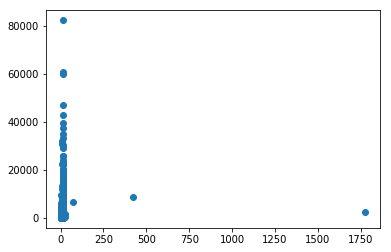

In [71]:
x = tweets['rating_numerator']
y = tweets['retweet_count']

plt.scatter(x,y);

#### Retweets

In [72]:
#Remove outliers from the chart for better analysis
tweets.sort_values(by = ['rating_numerator'], ascending = False)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count
753,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776,10,NaN,2598,5304
1787,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,420,10,NaN,8799,24580
511,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",75,10,NaN,6560,19194
571,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,pupper,1731,6871
1443,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,26,10,NaN,509,1771
316,822462944365645825,2017-01-20 15:17:01,This is Gabe. He was the unequivocal embodimen...,14,10,pupper,15622,29669
167,851464819735769094,2017-04-10 16:00:07,This is Iggy. He was a rescue dog killed in th...,14,10,NaN,7279,24598
567,778408200802557953,2016-09-21 01:39:11,RIP Loki. Thank you for the good times. You wi...,14,10,NaN,4661,14330
37,884441805382717440,2017-07-10 15:58:53,"I present to you, Pup in Hat. Pup in Hat is gr...",14,10,NaN,5458,26180
277,828650029636317184,2017-02-06 17:02:17,"Occasionally, we're sent fantastic stories. Th...",14,10,NaN,1431,9888


In [73]:
wo_outliers =  tweets.query('rating_numerator <= 20')

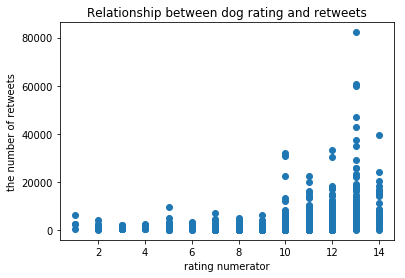

In [74]:
x = wo_outliers['rating_numerator']
y = wo_outliers['retweet_count']

plt.scatter(x,y)

plt.title('Relationship between dog rating and retweets')
plt.xlabel('rating numerator')
plt.ylabel('the number of retweets');

##### Likes

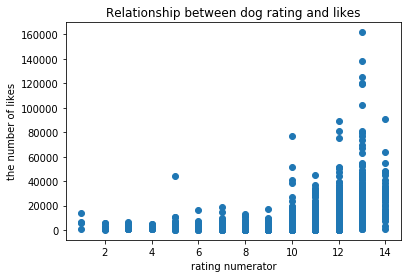

In [75]:
x = wo_outliers['rating_numerator']
y = wo_outliers['favorite_count']

plt.scatter(x,y)

plt.title('Relationship between dog rating and likes')
plt.xlabel('rating numerator')
plt.ylabel('the number of likes');

##### Relationship between retweets and likes

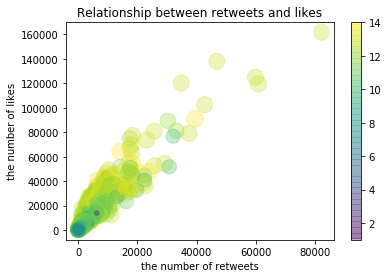

In [76]:
x = wo_outliers['retweet_count']
y = wo_outliers['favorite_count']

colors = wo_outliers['rating_numerator']
sizes =  wo_outliers['rating_numerator'] * 20

plt.scatter(x,y, c= colors, s=sizes, alpha = 0.3, cmap = 'viridis')

plt.colorbar();  # show color scale

plt.title('Relationship between retweets and likes')
plt.xlabel('the number of retweets')
plt.ylabel('the number of likes');

##### Dog Stage

In [77]:
mean_rating = wo_outliers.groupby('dog_stage').rating_numerator.mean()

In [78]:
mean_rating = pd.DataFrame(data=mean_rating)
mean_rating.head()

,rating_numerator
dog_stage,
doggo,11.728395
floofer,11.800000
pupper,10.735683
puppo,12.041667


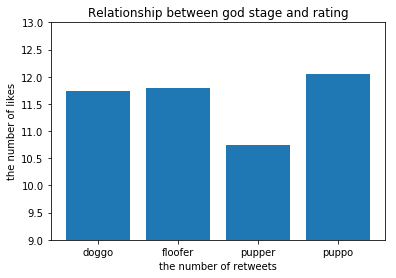

In [79]:
x = ['doggo', 'floofer', 'pupper', 'puppo']
y = mean_rating['rating_numerator']

plt.bar(x,y)

plt.title('Relationship between god stage and rating')
plt.ylim([9,13])
plt.xlabel('the number of retweets')
plt.ylabel('the number of likes');

### Insights
> The dog rating and the number of retweets and the number of likes have a positive relationship. i.e. the higher the rating is, the more retweets and likes the account gets.

> Due to its WeRateDogs's unique rating system, there a few extream ratings that exceed 20/10 such as 1750/10, 420/10 and 75/10. 

> Interestingly, these extremely high ratings do not affect the user's response.  Also, the rating of 13/10 is most likely to get many retweets and likes.  The number of retweets and likes are a positive relationship. The more retweets a tweet gets, the more like the tweet gets, and vise visa.  This makes sense as a tweet is retweeted or liked, there is a higher chance to be seen by many other users. 

> Dog stage does not so much affect the rating but dogs in 'puppo' stage get  slightly higher ratings

### Dog breed

In [80]:
images = pd.read_csv('image_predict_master.csv')
images.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,NaN,8162,37471
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,8.921774e+17,6040,32209
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,8.918152e+17,3999,24280
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,NaN,8314,40802
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,8.913276e+17,9010,39012


In [81]:
images.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,retweet_count,favorite_count
count,1.959000e+03,1959.000000,1959.0,1959.000000,1959.000000,1.454000e+03,1959.000000,1959.000000
mean,7.363129e+17,11.703420,10.0,1.200613,0.593960,7.412274e+17,2626.953548,8670.727922
std,6.761490e+16,41.026541,0.0,0.557317,0.272177,6.869777e+16,4679.949622,12697.344863
min,6.660209e+17,1.000000,10.0,1.000000,0.044333,6.660209e+17,11.000000,76.000000
25%,6.758342e+17,10.000000,10.0,1.000000,0.361531,6.782926e+17,582.500000,1842.500000
50%,7.090422e+17,11.000000,10.0,1.000000,0.587372,7.167971e+17,1261.000000,3934.000000
75%,7.885890e+17,12.000000,10.0,1.000000,0.845942,7.961074e+17,2993.500000,10802.500000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,8.921774e+17,82235.000000,161826.000000


Even for p1 images, the accuracy of image recognition is questionable. So we only use the images with more than 70% of confidence rate to analyze popular dog breed.

In [82]:
accurate_predict = images.query('p1_conf >= 0.7')
accurate_predict.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,8.918152e+17,3999,24280
10,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,13,10,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,8.900066e+17,7049,29730
12,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13,10,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,8.896654e+17,9649,46584
13,889638837579907072,2017-07-25 00:10:02,This is Ted. He does his best. Sometimes that'...,12,10,NaN,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French bulldog,0.991650,8.896388e+17,4360,26251
14,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13,10,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden retriever,0.953442,8.895311e+17,2165,14642


In [83]:
#Dog breed by the nuber of post
dog_posts = accurate_predict.groupby('p1').p1.count()
dog_posts = pd.DataFrame(data = dog_posts)
dog_posts= dog_posts.rename({'p1': 'frequency'}, axis = 1)
dog_posts['dog_name'] = dog_posts['frequency'].index

#Sort by frequency
dog_posts = dog_posts.sort_values(by=['frequency'], ascending = False)

In [84]:
dog_posts.head()

,frequency,dog_name
p1,,
golden retriever,86,golden retriever
Pembroke,51,Pembroke
Labrador retriever,43,Labrador retriever
pug,35,pug
Chihuahua,32,Chihuahua


In [85]:
#Popularity by rating, number of retweet and  likes
#Remove outlierts from rating
wo_outliers_ranking =  accurate_predict.query('rating_numerator <= 20')
popular_breed_by_rating = wo_outliers_ranking.groupby('p1').rating_numerator.mean()
popular_breed_by_rating = pd.DataFrame(data=popular_breed_by_rating)
popular_breed_by_rating['dog_name'] = popular_breed_by_rating['rating_numerator'].index

popular_breed_by_rt = wo_outliers_ranking.groupby('p1').retweet_count.mean()
popular_breed_by_rt = pd.DataFrame(data=popular_breed_by_rt)
popular_breed_by_rt['dog_name'] = popular_breed_by_rt['retweet_count'].index

popular_breed_by_like = wo_outliers_ranking.groupby('p1').favorite_count.mean()
popular_breed_by_like = pd.DataFrame(data=popular_breed_by_like)
popular_breed_by_like['dog_name'] = popular_breed_by_like['favorite_count'].index

In [86]:
popular_breed_by_rating.head()

,rating_numerator,dog_name
p1,,
Afghan hound,13.0,Afghan hound
African hunting dog,8.0,African hunting dog
Airedale,11.0,Airedale
American Staffordshire terrier,11.2,American Staffordshire terrier
Angora,2.0,Angora


In [87]:
#Merge these 3 popular_breed df with god_posts df
popular_breed = pd.merge(dog_posts, popular_breed_by_rating, on = 'dog_name')
popular_breed = pd.merge(popular_breed, popular_breed_by_rt, on = 'dog_name')
popular_breed = pd.merge(popular_breed, popular_breed_by_like, on = 'dog_name')

In [88]:
popular_breed.head(10)

,frequency,dog_name,rating_numerator,retweet_count,favorite_count
0,86,golden retriever,11.686047,3602.406977,12816.127907
1,51,Pembroke,11.627451,3632.313725,12695.450980
2,43,Labrador retriever,11.418605,5470.093023,16233.441860
3,35,pug,10.257143,1588.857143,5001.800000
4,32,Chihuahua,10.656250,2103.562500,7562.156250
5,23,Samoyed,12.043478,4369.826087,13534.173913
6,23,Pomeranian,11.173913,2301.913043,6103.521739
7,19,French bulldog,11.157895,5123.368421,19645.473684
8,19,chow,11.789474,2394.842105,9763.684211
9,15,toy poodle,11.400000,1591.000000,5150.533333


In [89]:
top10_popular_breed = popular_breed.head(10)

In [90]:
top10_popular_breed

,frequency,dog_name,rating_numerator,retweet_count,favorite_count
0,86,golden retriever,11.686047,3602.406977,12816.127907
1,51,Pembroke,11.627451,3632.313725,12695.450980
2,43,Labrador retriever,11.418605,5470.093023,16233.441860
3,35,pug,10.257143,1588.857143,5001.800000
4,32,Chihuahua,10.656250,2103.562500,7562.156250
5,23,Samoyed,12.043478,4369.826087,13534.173913
6,23,Pomeranian,11.173913,2301.913043,6103.521739
7,19,French bulldog,11.157895,5123.368421,19645.473684
8,19,chow,11.789474,2394.842105,9763.684211
9,15,toy poodle,11.400000,1591.000000,5150.533333


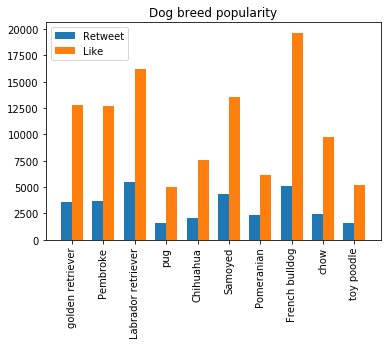

In [91]:
import numpy as np

N = 10
rating = top10_popular_breed['rating_numerator']

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars


rt = top10_popular_breed['retweet_count']
p1 = ax.bar(ind, rt, width)


like = top10_popular_breed['favorite_count']
p2 = ax.bar(ind + width, like, width)


ax.set_title('Dog breed popularity')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(top10_popular_breed['dog_name'], rotation='vertical')

ax.legend((p1[0], p2[0]), ('Retweet', 'Like'))

ax.autoscale_view()

plt.show()

In [92]:
#Dog breed by frequency
top10_popular_breed_freq = top10_popular_breed.sort_values('frequency',ascending=False)
top10_popular_breed_freq.head(10)

,frequency,dog_name,rating_numerator,retweet_count,favorite_count
0,86,golden retriever,11.686047,3602.406977,12816.127907
1,51,Pembroke,11.627451,3632.313725,12695.450980
2,43,Labrador retriever,11.418605,5470.093023,16233.441860
3,35,pug,10.257143,1588.857143,5001.800000
4,32,Chihuahua,10.656250,2103.562500,7562.156250
5,23,Samoyed,12.043478,4369.826087,13534.173913
6,23,Pomeranian,11.173913,2301.913043,6103.521739
7,19,French bulldog,11.157895,5123.368421,19645.473684
8,19,chow,11.789474,2394.842105,9763.684211
9,15,toy poodle,11.400000,1591.000000,5150.533333


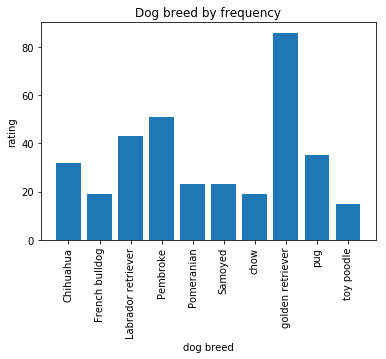

In [93]:
x = top10_popular_breed_freq['dog_name']
y = top10_popular_breed_freq['frequency']

plt.bar(x,y)

plt.title('Dog breed by frequency')
plt.xticks(rotation='vertical')
plt.xlabel('dog breed')
plt.ylabel('rating');

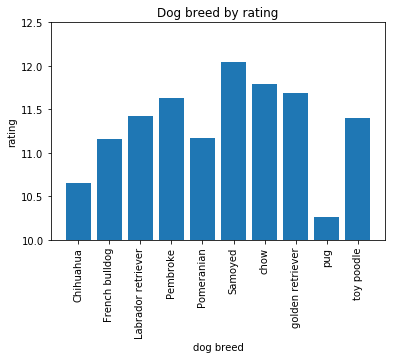

In [94]:
x = top10_popular_breed_freq['dog_name']
y = top10_popular_breed_freq['rating_numerator']

plt.bar(x,y)
plt.title('Dog breed by rating')
plt.xticks(rotation='vertical')
plt.xlabel('dog breed')
plt.ylim(10,12.5)
plt.ylabel('rating');

### Insight
>The most frequently posted dog breeds are Golden retriever, Pembroke, and Labrador retriever. The most highly rated dog breeds by WeRateDogs are Samoyed, Chow, Golden retriever. 
From these results, we can tell that WeRateDogs have a tendency to post Golden retriever because WeRateDogs personally like Golden retriever. As this twitter account is so popular, I expect WeRateDogs receives a lot of submission from users and WeRateDogs prescreens based on their preference. If you want to be featured on WeRateDogs account, sending Golden retriever's picture might be a good idea.


>On the other hand, the most retweeted dog breeds are Labrador retriever, French Bulldog, and Samoyed and the most liked dog breeds are French bulldog, Labrador retriever, and Samoyed. The followers of WeRateDogs like French Bulldogs and Samoyed. If you want your dog picture to be seen by many Twitter users, sending French Bulldog and Samoyed might be a good idea.